In [3]:
import os

import numpy as np

import requests
import json

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [4]:
image_path = "anitta.jpg"

image = load_img(image_path, target_size=(128, 128))
input_arr = np.array([img_to_array(image)/255.0])

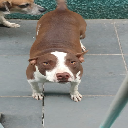

In [28]:
image

In [5]:
model_dir = "models/"
os.environ["model_dir"] = os.path.abspath(model_dir)
os.path.abspath(model_dir)

'/home/henrique/projects/cat-or-dog/tensorflow/models'

In [6]:
%%bash --bg 
nohup tensorflow_model_server --rest_api_port=8501 --model_name=mobilenet --model_base_path="${model_dir}" >server.log 2>&1

In [9]:
!tail server.log

2020-08-05 20:25:42.520269: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:295] Reading SavedModel debug info (if present) from: /home/henrique/projects/cat-or-dog/tensorflow/models/1
2020-08-05 20:25:42.520330: I external/org_tensorflow/tensorflow/core/platform/cpu_feature_guard.cc:143] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2020-08-05 20:25:42.608413: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2020-08-05 20:25:42.898677: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:183] Running initialization op on SavedModel bundle at path: /home/henrique/projects/cat-or-dog/tensorflow/models/1
2020-08-05 20:25:43.023711: I external/org_tensorflow/tensorflow/cc/saved_model/loader.cc:364] SavedModel load for tags { serve }; Status: success: OK. Took 540341 microseconds.
2020-08-05 20:25:43.051355: I tensorflow_serving/servables/tensorflow/saved_model_warmup.cc:105

In [10]:
data = json.dumps({"signature": "serving_default", "instances": input_arr.tolist()})
headers = {"Content-Type": "application/json"}

In [11]:
json_response = requests.post(url="http://localhost:8501/v1/models/mobilenet:predict", 
                              data=data, 
                              headers=headers)

In [12]:
json_response

<Response [200]>

In [25]:
class_dict = {
    0: "cat",
    1: "dog"
}

In [27]:
predictions = json.loads(json_response.text)["predictions"]
class_predicted = class_dict[round(predictions[0][0])]
print("Predicted class: ", class_predicted)

Predicted class:  dog
